In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [29]:
data = pd.read_csv("dataset/attack1withlabels_7feature.csv")
#data = data.dropna(axis=0, how="any")#remove invalid data
data = data.dropna(axis=0, how="any")#remove invalid data
data.shape

(97118, 19)

In [30]:

X = data.iloc[:,12:18] #In our case, we use the feature of 1-6, the feature of distance rejected
y = data.iloc[:,11]


In [31]:
from tensorflow.python.keras import backend as k
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
import tensorflow
from sklearn import model_selection


-------------------------------------------------------------------------
The number of iteration is :  0
19424/19424 [==============================] - 5s 246us/step
-------------------------------------------------------------------------
The number of iteration is :  1
19424/19424 [==============================] - 5s 256us/step
-------------------------------------------------------------------------
The number of iteration is :  2
19424/19424 [==============================] - 5s 254us/step
-------------------------------------------------------------------------
The number of iteration is :  3
19424/19424 [==============================] - 5s 259us/step
-------------------------------------------------------------------------
The number of iteration is :  4
19424/19424 [==============================] - 5s 275us/step
-------------------------------------------------------------------------
The number of iteration is :  5
19424/19424 [==============================] - 5s 268us/ste

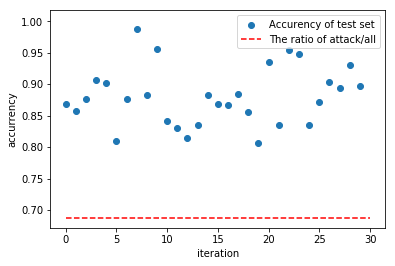

In [51]:
accurency_list = []
itr =30
for i in range(itr):
    # model implementation
    print("-------------------------------------------------------------------------")
    print("The number of iteration is : ", i)
    model = Sequential()
    model.add(LSTM(32, input_shape=(None,6),return_sequences=False))
    model.add(Dense(8, input_dim=6))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2)
    #to satisfait LSTM
    X_train = np.reshape(X_train.values, (X_train.shape[0], 1,X_train.shape[1]))
    X_test =np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    #fit data
    model.fit(X_train,y_train,verbose = 0,epochs=10,batch_size=1000)
    #evaluation data
    cost = model.evaluate(X_test,y_test)
    #print('loss \n',cost[0])
    #print('accurency \n',cost[1])
    accurency_list.append(cost[1])
plt.scatter(range(itr),accurency_list,label = 'Accurency of test set')
plt.hlines(1-sum(y_test)/y_test.shape[0], 0, itr, colors = "r", linestyles = "dashed",label="The ratio of attack/all")
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("accurrency")
plt.show()
